In [1]:
import numpy as np
import matplotlib.pyplot as mp
import os
import scipy.fftpack as fft
from astropy.constants import g0; g0 = g0.value
import scipy.special as spec
from jupyterthemes import jtplot

In [9]:
jtplot.reset()
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"

In [3]:
m1 = 50e-3
w0 = lambda l : np.sqrt(g0/l)
w1 = w0(.64)

In [5]:
w1/2/np.pi

0.623003494160964

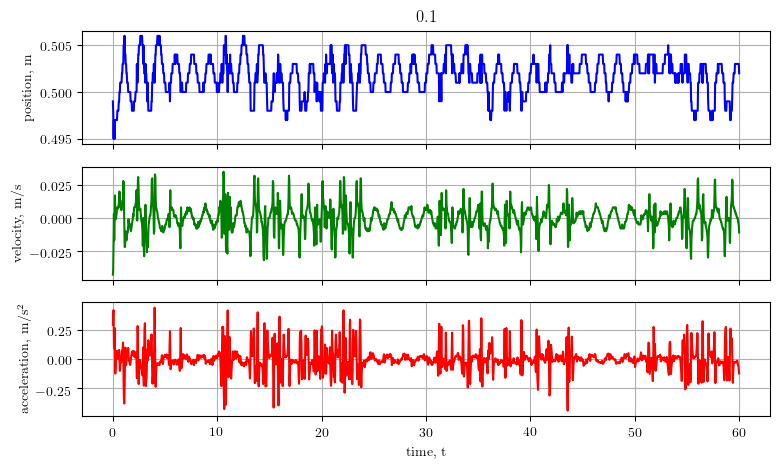

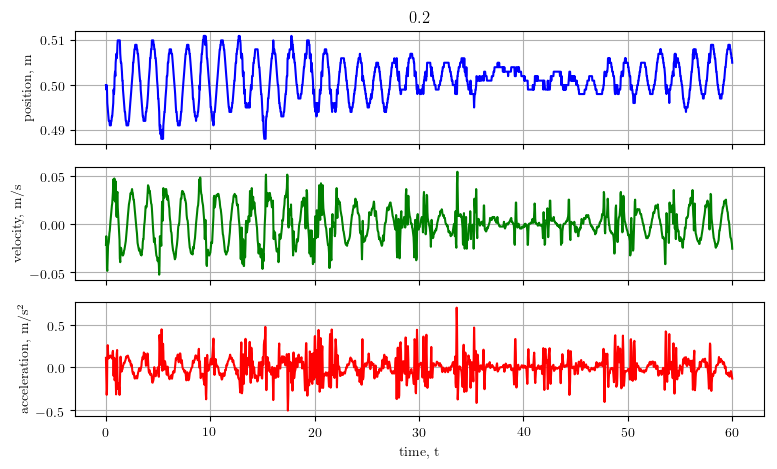

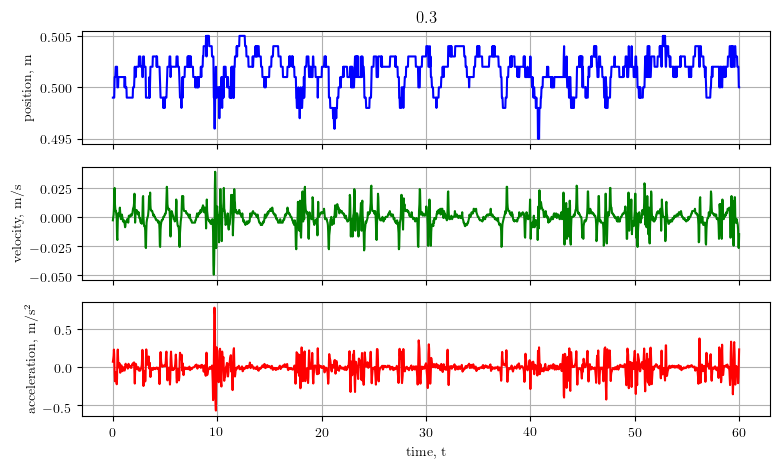

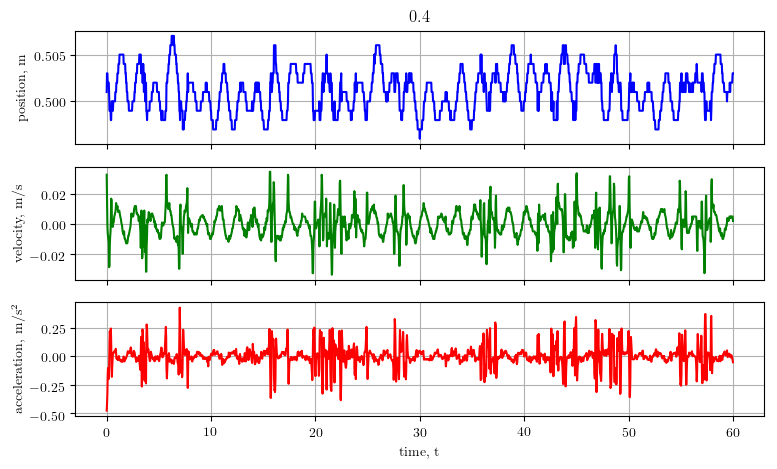

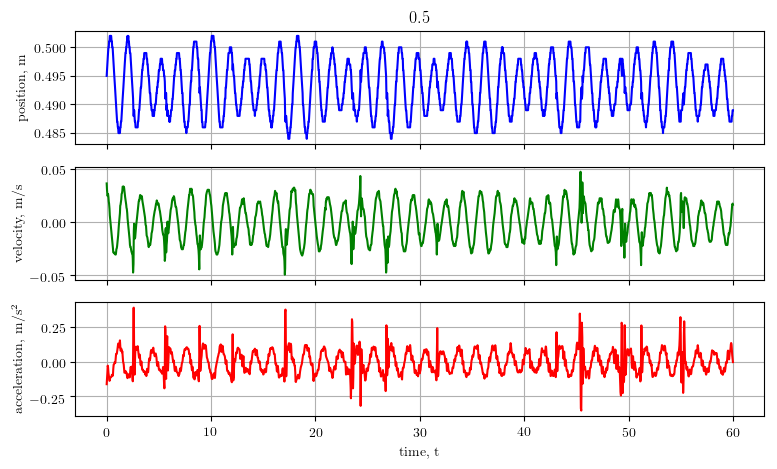

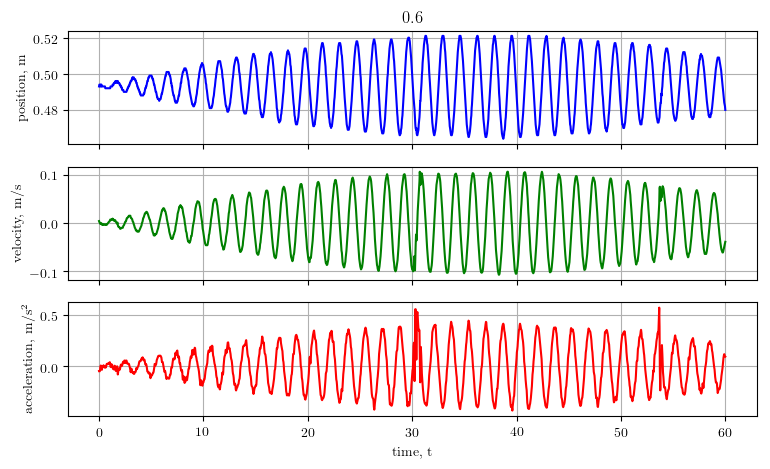

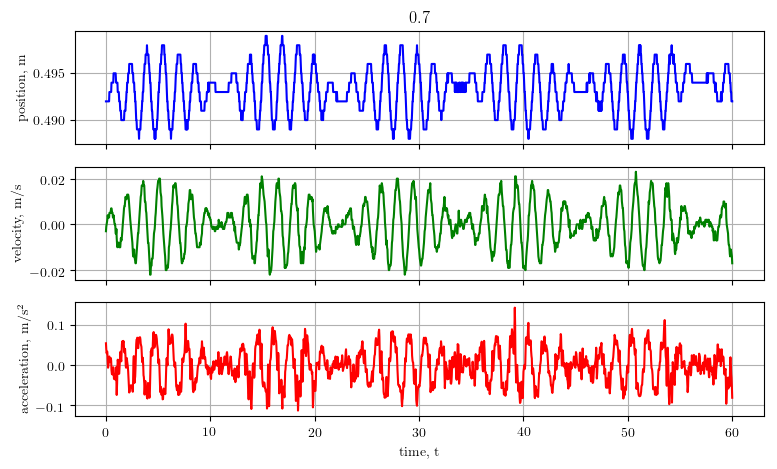

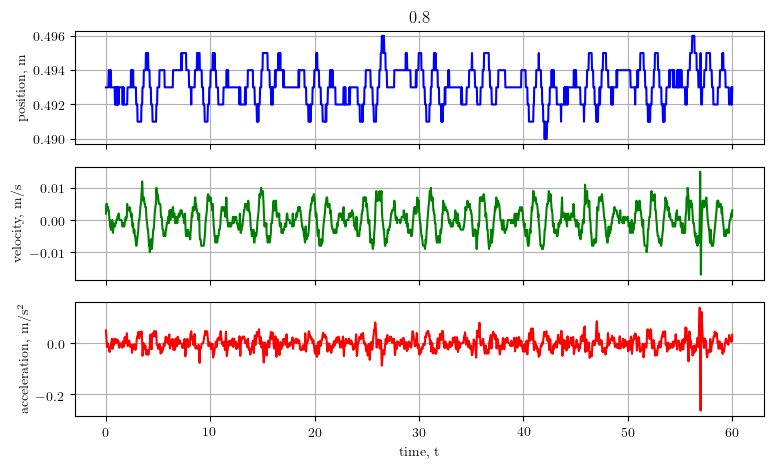

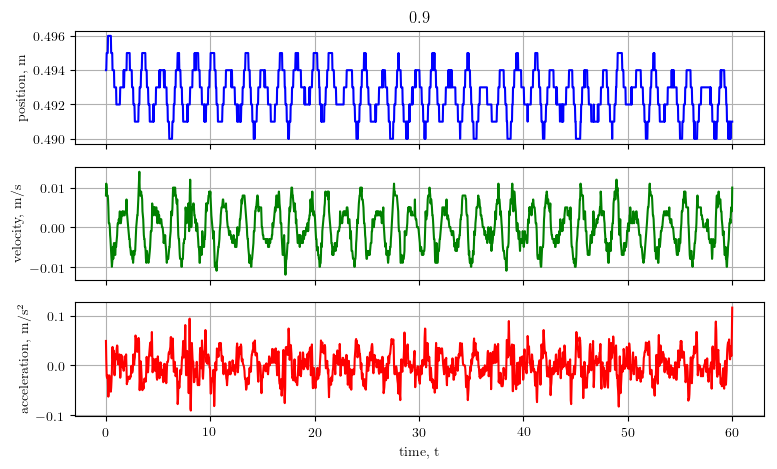

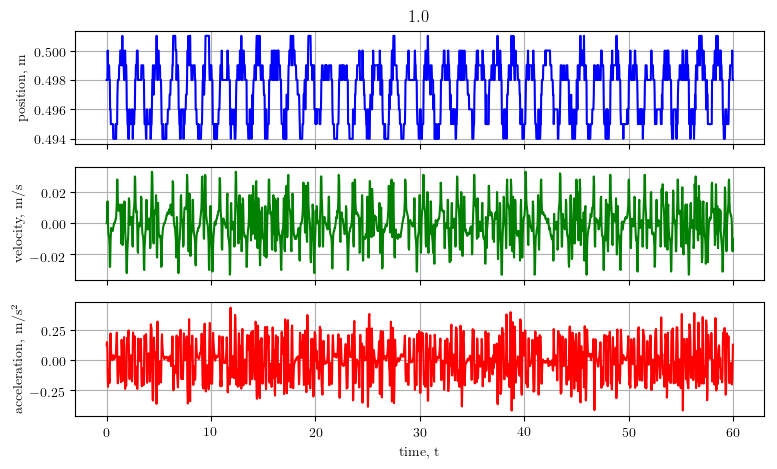

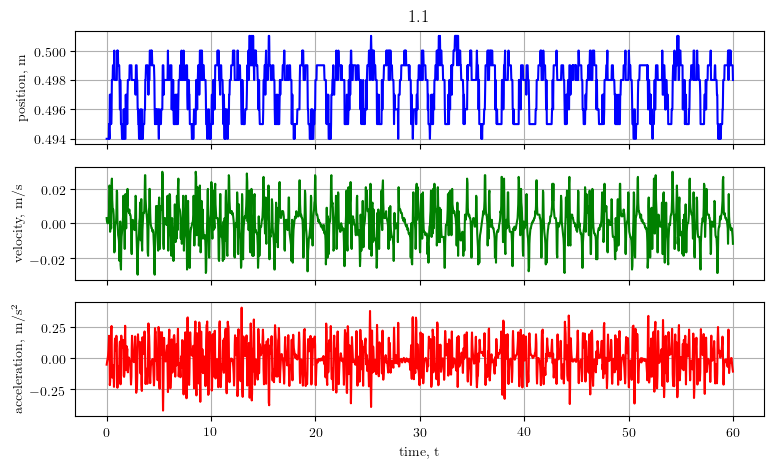

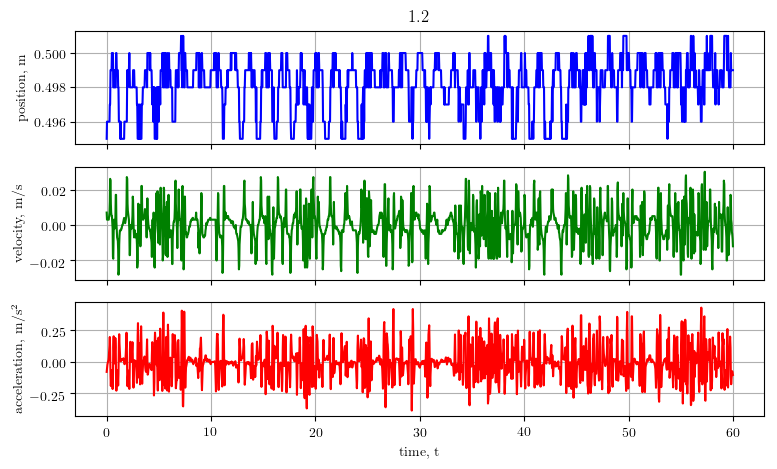

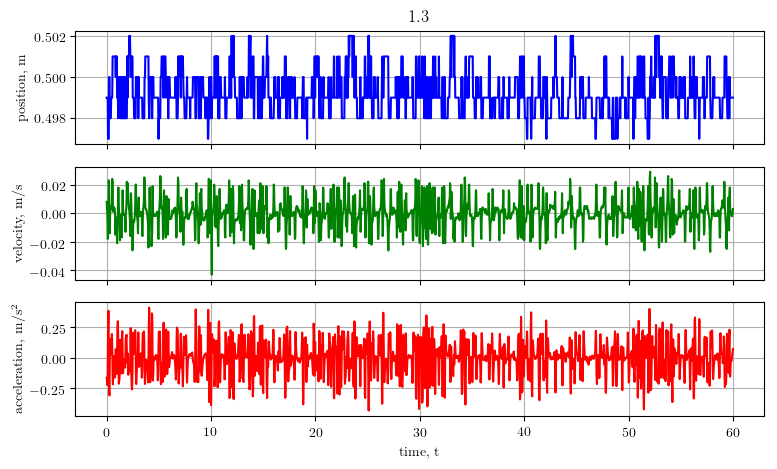

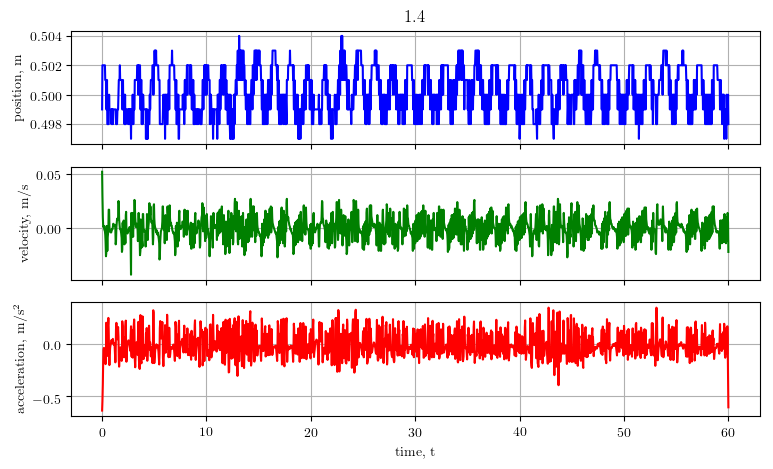

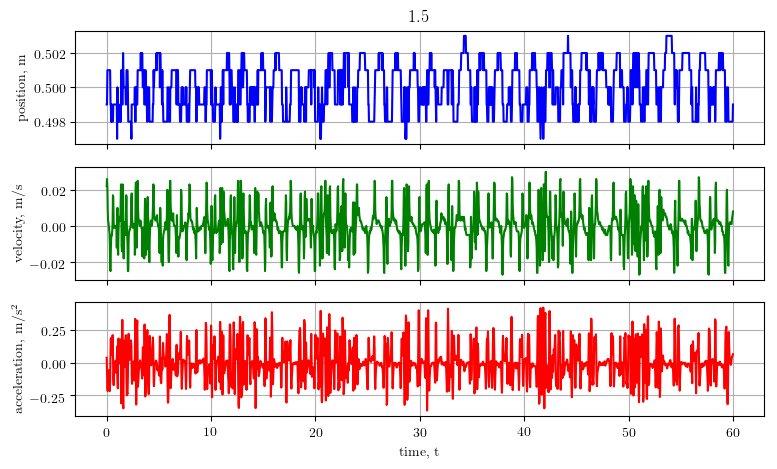

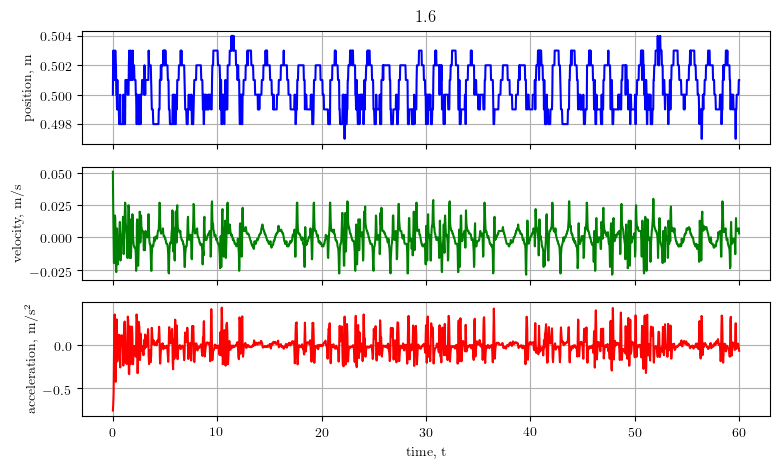

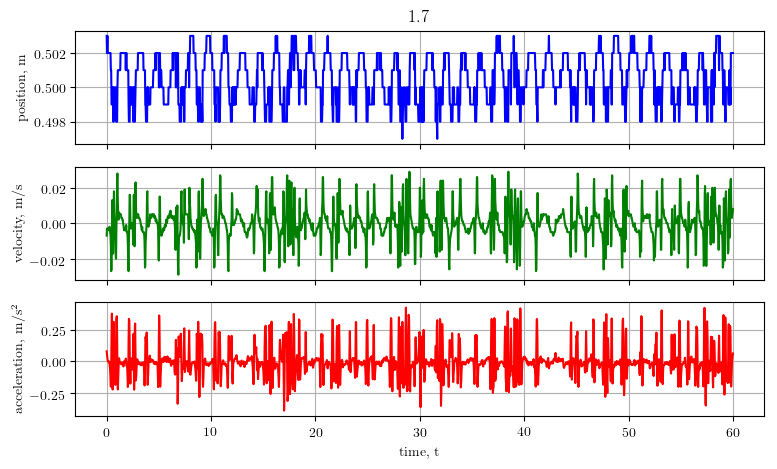

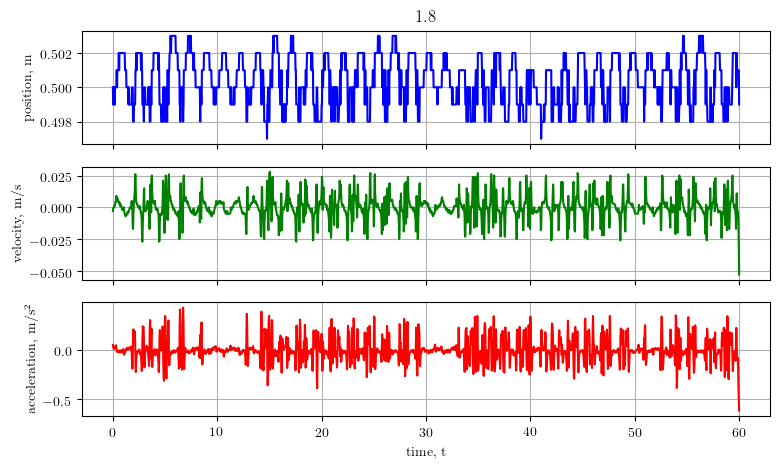

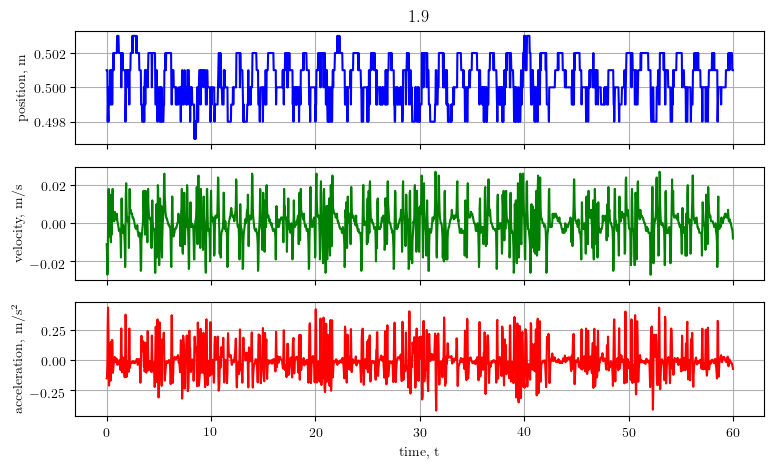

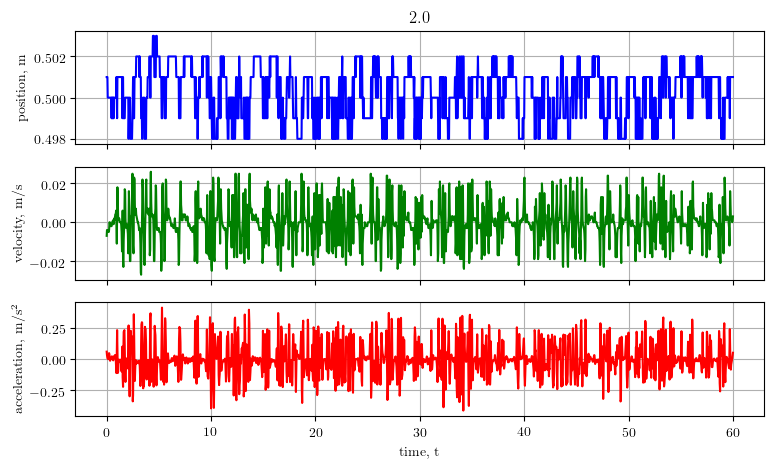

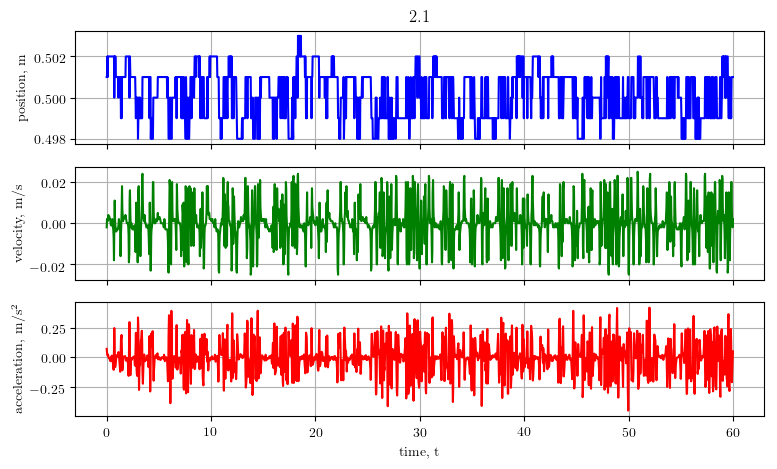

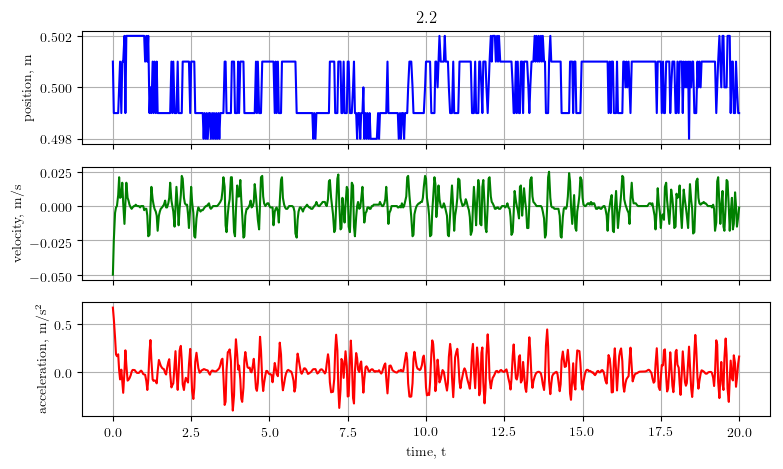

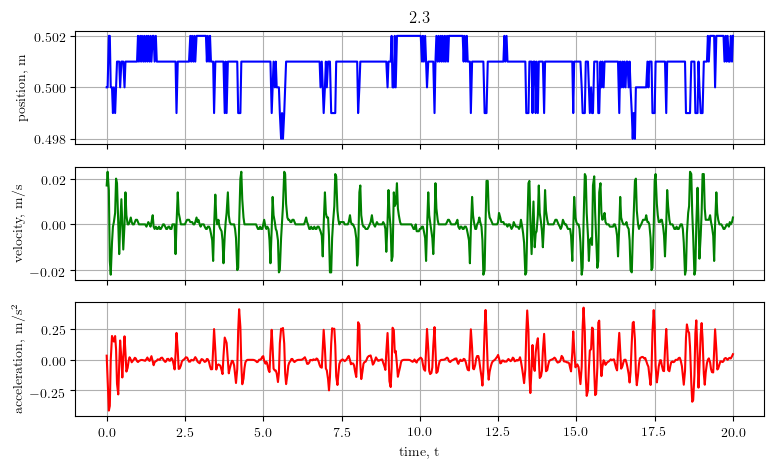

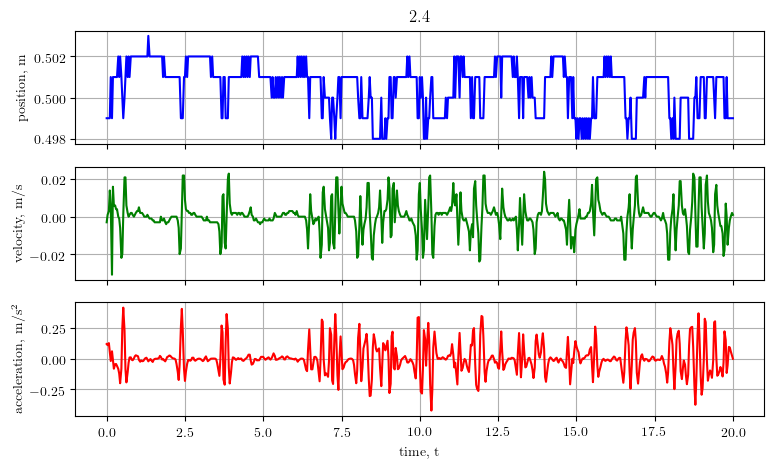

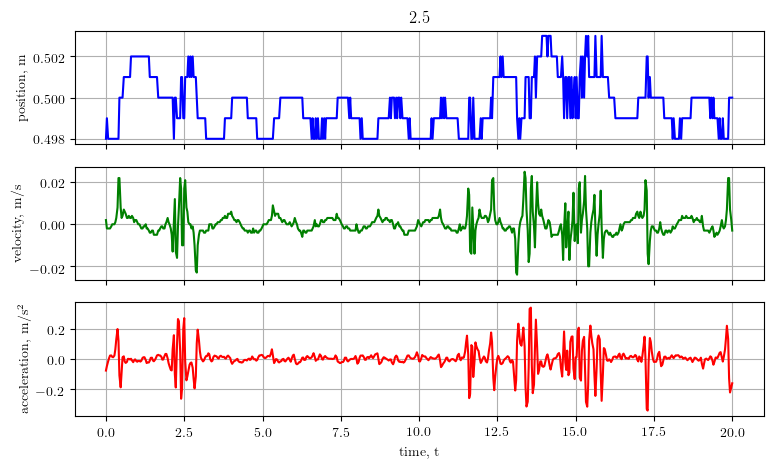

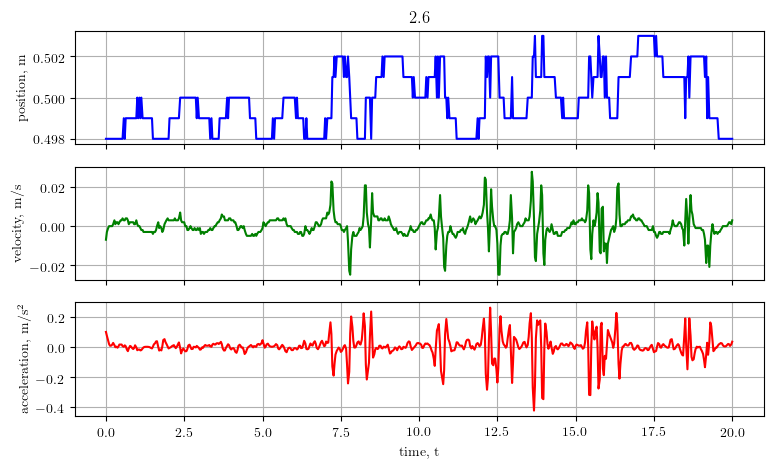

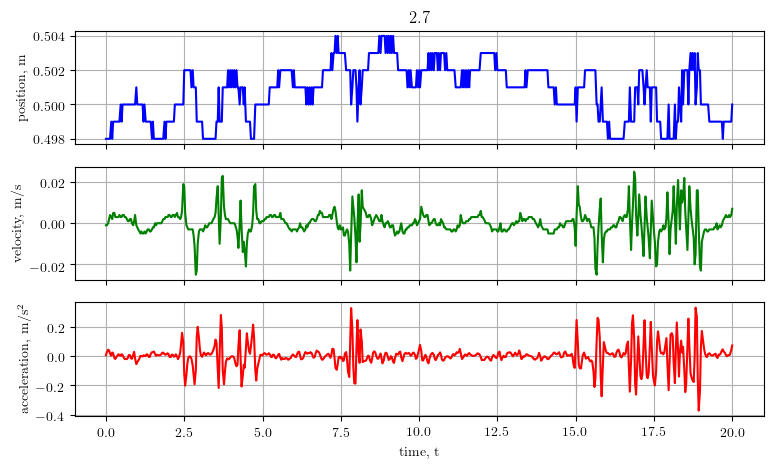

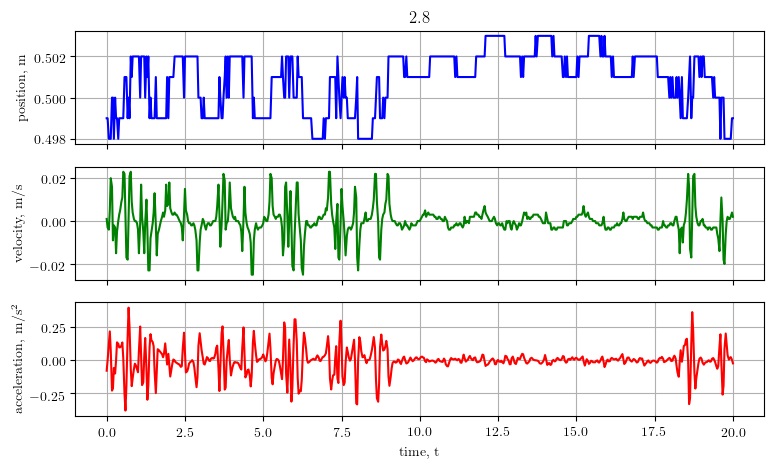

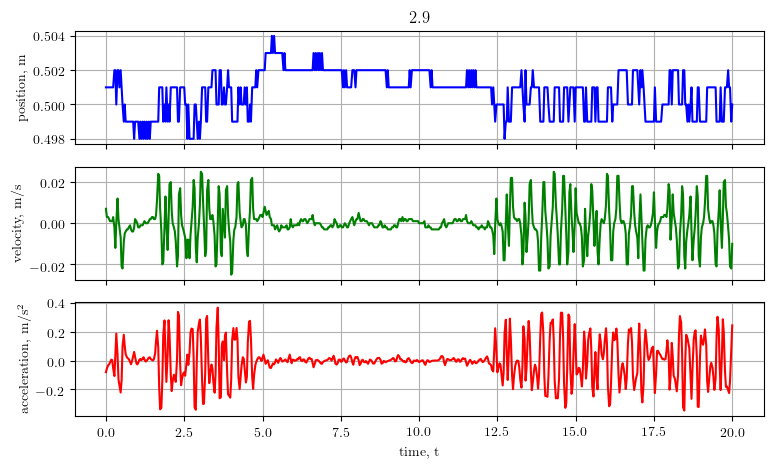

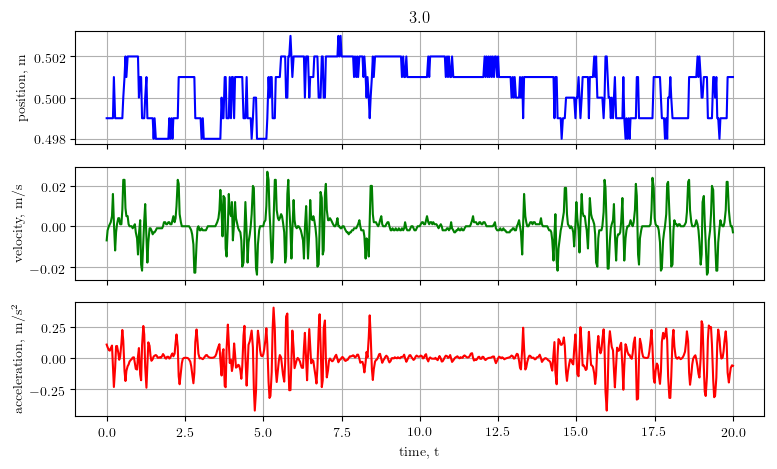

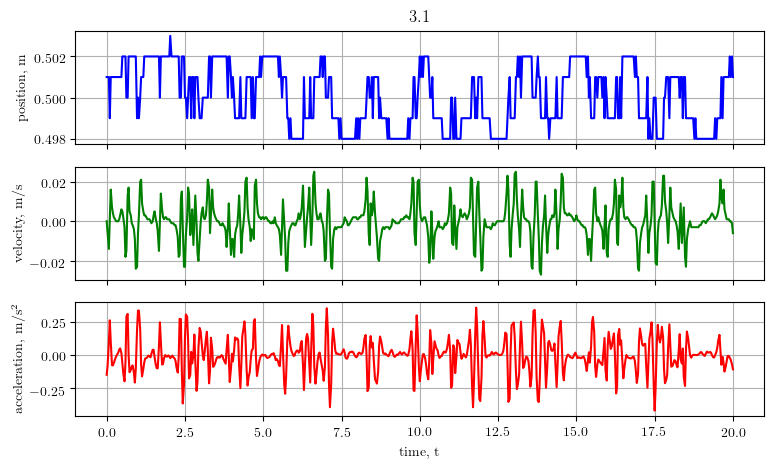

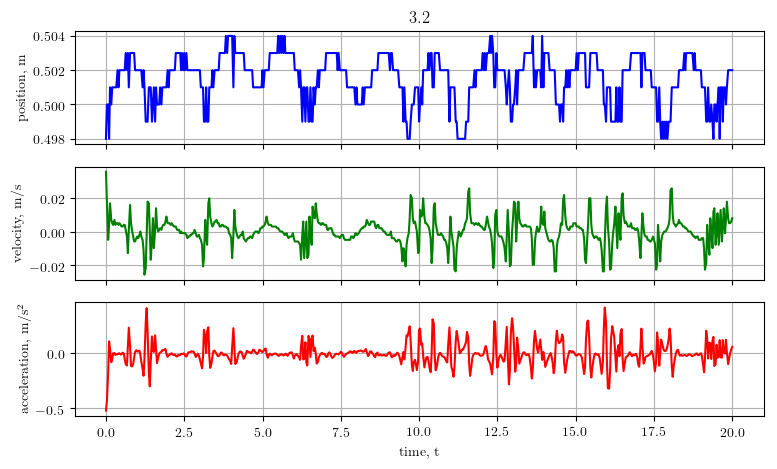

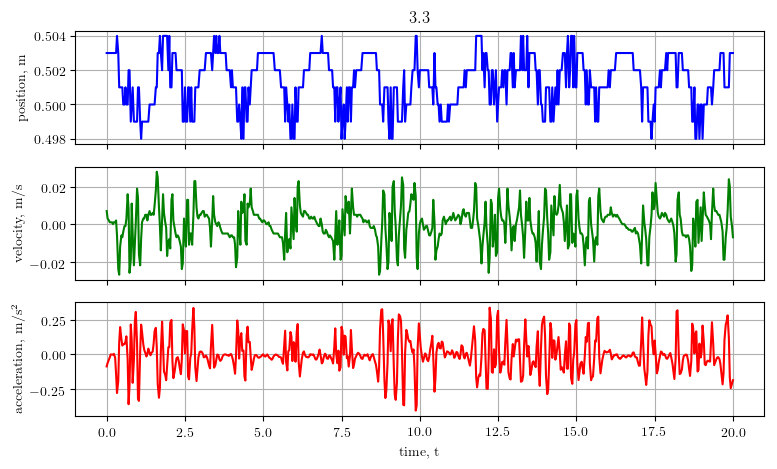

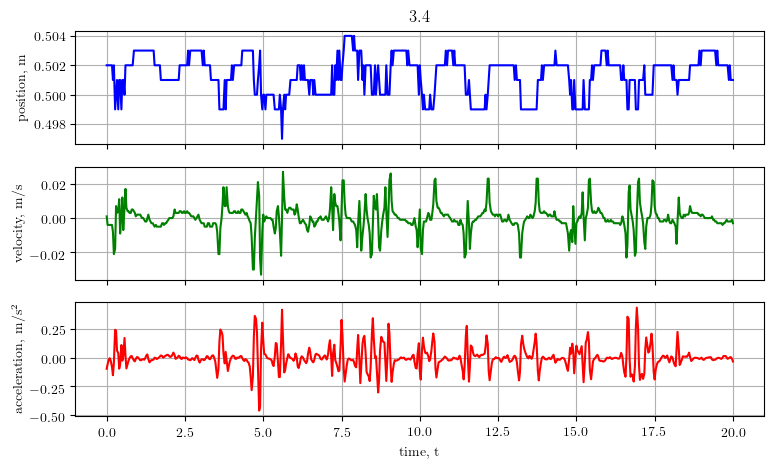

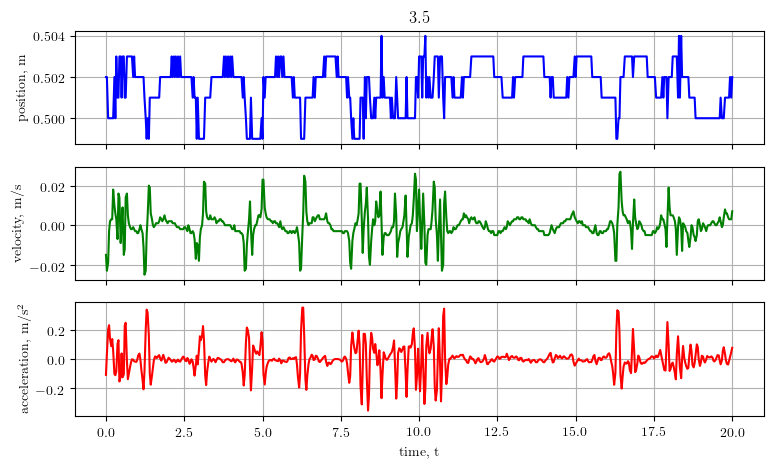

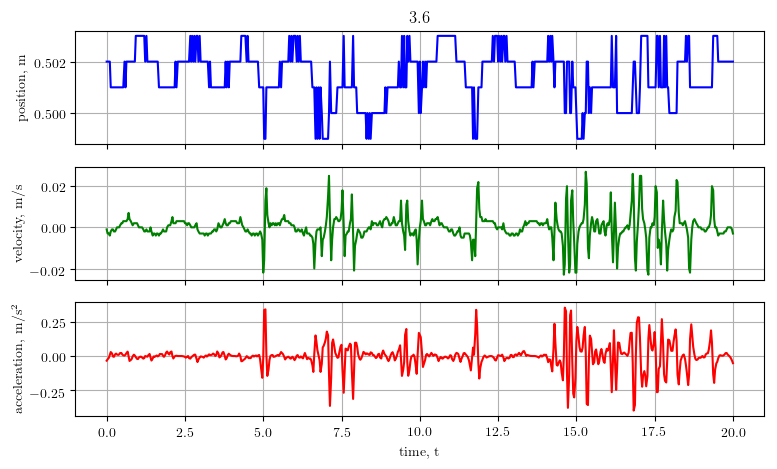

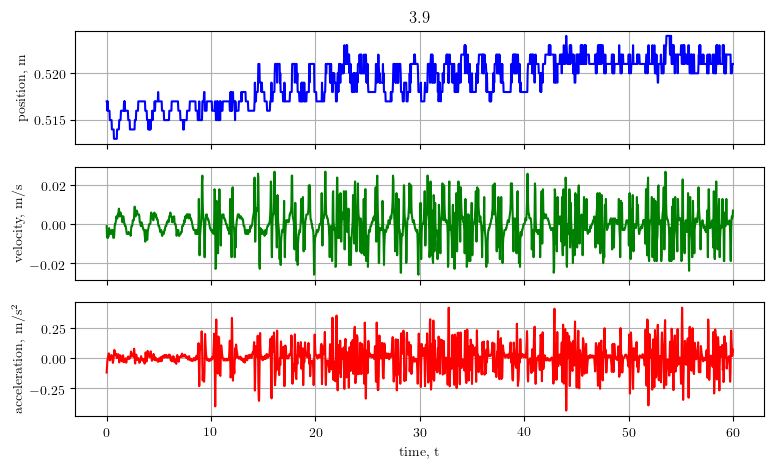

In [5]:
A = []

for _, __, files in os.walk("."):
    for file in files:
        if file.endswith(".txt"):
            t, x, v, a = np.genfromtxt(file, skip_header=7).T
            fig, (ax1, ax2, ax3) = mp.subplots(3, 1, sharex=True)

            ax1.plot(t, x, "b-")
            ax1.set_ylabel("position, m")
            ax1.set_title(file[:-4])
            ax1.grid(True)

            ax2.plot(t, v, "g-")
            ax2.set_ylabel("velocity, m/s")
            ax2.grid(True)

            ax3.plot(t, a, "r-")
            ax3.grid(True)
            ax3.set_ylabel("acceleration, m/s$^2$")
            ax3.set_xlabel("time, t")
            
            A.append(x.max())
            
            mp.show()

In [6]:
A = np.array(A)
fd = np.concatenate((np.arange(0.1, 3.7, 0.1), [3.9]))
wd = 2*np.pi*fd

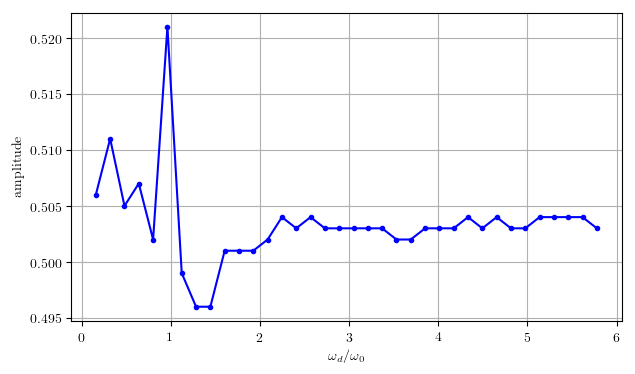

In [15]:
mp.figure(figsize=(4*16/9, 4))
mp.plot(wd[:-1]/w1, A[:-1], "b.-")
mp.xlabel(r"$\omega_d/\omega_0$")
mp.ylabel("amplitude")
mp.grid(True)
mp.savefig("resonance.png", dpi=300, bbox_inches="tight")
mp.show()

In [7]:
def approx(t, A, w, w0, L):
    return A*w**2/L/(w0**2 - w**2) * (np.cos(w*t) - np.cos(w0*t))

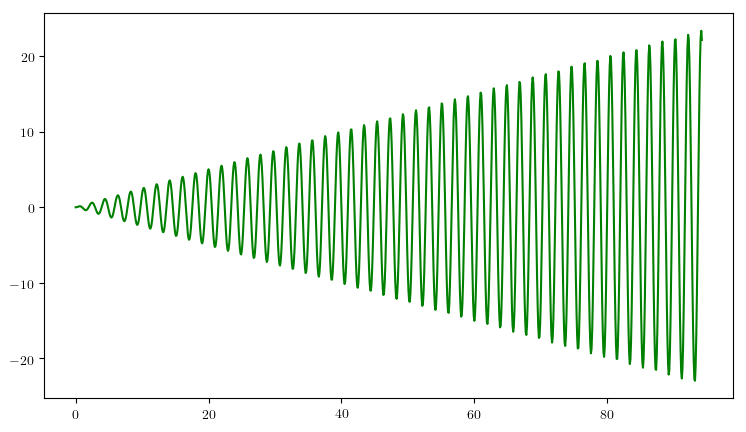

In [10]:
t = np.linspace(0, 30*np.pi, 1000)
mp.plot(t, approx(A=0.1, w=0.513*2*np.pi, w0=0.512*2*np.pi, L=0.64, t=t), "g-")
mp.show()